In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline


from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import losses

from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.utils import to_categorical

Using TensorFlow backend.
/Users/ajinthchristudas/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/Users/ajinthchristudas/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Load training data

Load `train.csv` from Kaggle into a pandas DataFrame.

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X = train[train.columns[1:]].values
y = train['label']

print (type(X))
print (type(y))


print ('X Shape ', X.shape)
print ('Y Shape ', y.shape)

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
X Shape  (42000, 784)
Y Shape  (42000,)


# Analyzing the Training Digits 

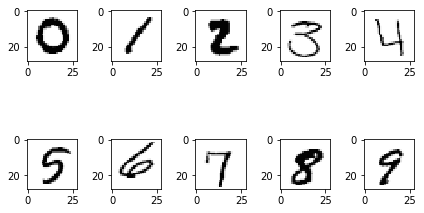

In [5]:
fig, ax = plt.subplots(nrows=2, ncols=5)

ax = ax.flatten()

for i in range(10): 
    
    img = X[y==i][0].reshape(28,28)
    ax[i].imshow(img, cmap='Greys')
    
plt.tight_layout()
plt.show()

### Preprocessing

1. When dealing with image data, you need to normalize your `X` by dividing each value by the max number of pixels (255).
2. Since this is a multiclass classification problem, keras needs `y` to be a one-hot encoded matrix

In [6]:
X = X/255.
y = to_categorical(y)

In [8]:
print ('X Shape ', X.shape)
print ('Y Shape ', y.shape)

X Shape  (42000, 784)
Y Shape  (42000, 10)


In [15]:
X[5:10]

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

### Train/Test Split

We want to create a validation set that the model will never see to approximate how it's going to do with Kaggle's `test.csv`. Use `sklearn`'s `train_test_split` to do this.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

### Create your neural network

Create a neural network using the `Dense` and `Dropout` layers from `keras`. Your activation function for the final output layer needs to be `softmax` to accomidate the ten different classes.

In [118]:
model = Sequential()

model.add(Dense(X_train.shape[1], input_dim = X_train.shape[1], activation='relu'))

model.add(Dropout(.5))
model.add(Dense(int(X_train.shape[1]/2), activation='relu'))
model.add(Dense(int(X_train.shape[1]/4), activation='relu'))
model.add(Dense(int(X_train.shape[1]/8), activation='relu'))
model.add(Dense(int(X_train.shape[1]/16), activation='relu'))

model.add(Dense(y.shape[1], activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=100)

Train on 33600 samples, validate on 8400 samples
Epoch 1/50
33600/33600 [==============================] - 8s 251us/step - loss: 0.9713 - acc: 0.6690 - val_loss: 0.2626 - val_acc: 0.9260
Epoch 2/50
33600/33600 [==============================] - 8s 224us/step - loss: 0.3376 - acc: 0.9104 - val_loss: 0.1856 - val_acc: 0.9482
Epoch 3/50
33600/33600 [==============================] - 7s 221us/step - loss: 0.2548 - acc: 0.9335 - val_loss: 0.1567 - val_acc: 0.9551
Epoch 4/50
33600/33600 [==============================] - 7s 221us/step - loss: 0.2159 - acc: 0.9439 - val_loss: 0.1394 - val_acc: 0.9617
Epoch 5/50
33600/33600 [==============================] - 7s 223us/step - loss: 0.1915 - acc: 0.9511 - val_loss: 0.1299 - val_acc: 0.9632
Epoch 6/50
33600/33600 [==============================] - 8s 229us/step - loss: 0.1664 - acc: 0.9574 - val_loss: 0.1282 - val_acc: 0.9676
Epoch 7/50
33600/33600 [==============================] - 8s 241us/step - loss: 0.1519 - acc: 0.9609 - val_loss: 0.1258 - v

### Compile your model

Since this is a multiclass classification problem, your loss function is `categorical_crossentropy`.

In [119]:
# Done in the previous step 

### Fit the model

Use your X_test, y_test from the `train_test_split` step for the `validation_data` parameter.

In [120]:
# Done in the Previous step 

### Load in Kaggle's `test.csv`

Be sure to do the **same** preprocessing you did for your training `X`.

In [121]:
test = pd.read_csv('test.csv')

In [122]:
X = test.values

In [123]:
X = X/255.

### Create your predictions

Use `predict_classes` to get the actual numerical values (0-9).

In [124]:
pred = model.predict_classes(X)

In [125]:
pred[:25]

array([2, 0, 9, 9, 3, 7, 0, 3, 0, 3, 5, 7, 4, 0, 4, 3, 3, 1, 9, 0, 9, 1, 1,
       5, 7])

### Prepare your submission

1. Add your predictions to a column called `Label`
2. You'll need to manually create the `ImageId` column, which is just a list of 1..[NUMBER OF TEST SAMPLES]

In [128]:
Label = pred

### Create your submission csv

Remember to set `index=False`!

In [129]:
pd.DataFrame({"ImageId": list(range(1,len(Label)+1)), "Label": Label}).to_csv('predictions.csv', \
                                                                              index=False, header=True)